In [9]:
# JLCY 20210322

# based on 
# https://github.com/a2e-mmc/assessment/blob/
# study/coupling_comparison/studies/coupling_comparison/
# preprocessing/internal/wrf_to_sowfa.ipynb

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import sys
import datetime

from mmctools.dataloaders import read_dir
from mmctools.wrf.utils import extract_column_from_wrfdata
from mmctools.coupling.sowfa import InternalCoupling
from mmctools.helper_functions import calc_wind
from mmctools.plotting import plot_timehistory_at_height, plot_profile

file_filter  = 'mmc_d02_*'
# file_filter  = 'wrfout_d02_*'

# c1
site_latitude  = 36.6050
site_longitude = -97.485

# Define how WRF data is filtered to site specific data
# - 'interpolate': interpolate to site coordinates
# - 'nearest': use nearest WRF grid point
# - 'average': average of an area L_filter x Lfilter centred around the site
spatial_filter = 'interpolate'
L_filter = 0.0

def convert_xa_to_df(xa, target_date): 

    # Round timestamp to 10min
    xa['Time'] = xa['Time'].dt.round('10min')

    df = xa.to_dataframe().loc[:,['U10', 'V10', 'U', 'V', 'W', 'theta', 
                                  'T_TEND_ADV', 'MUT', 'RU_TEND', 'MUU', 'RV_TEND', 'MUV'
                                  ]].reset_index()
    df.rename(index=str, columns={"Time": "datetime"},inplace=True)
    df.set_index('datetime',inplace=True)

    df = df.loc[target_date]

    df['ws'], df['wd'] = calc_wind(df, 'U', 'V')
    df['ws10'], df['wd10'] = calc_wind(df, 'U10', 'V10')
    
    df['t_adv'] = df['T_TEND_ADV'] / df['MUT']
    df['u_tend'] = df['RU_TEND'] / df['MUU']
    df['v_tend'] = df['RV_TEND'] / df['MUV']
    
    return df

## 0805 edmf

In [2]:
target_date = '2018-08-05'
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/'

In [24]:
xa_0805e11 = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude+0.1,site_longitude+0.1),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_22:00:00

In [26]:
df_0805e11 = convert_xa_to_df(xa_0805e11, target_date)

In [25]:
xa_0805e12 = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude-0.1,site_longitude-0.1),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_22:00:00

In [27]:
df_0805e12 = convert_xa_to_df(xa_0805e12, target_date)

In [52]:
xa_0805e21 = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude+0.1,site_longitude-0.1),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

df_0805e21 = convert_xa_to_df(xa_0805e21, target_date)

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_22:00:00

In [53]:
xa_0805e22 = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude-0.1,site_longitude+0.1),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

df_0805e22 = convert_xa_to_df(xa_0805e22, target_date)

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_22:00:00

In [3]:
# leads to error at restart times... 
xa_0805e = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

df_0805e = convert_xa_to_df(xa_0805e, target_date)

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_00:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_01:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_02:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_03:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_04:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_05:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_06:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_07:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_08:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_09:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/target/mmc_d02_2018-08-05_10:00:00

In [10]:
lasso_file = '/projects/mmcpnnl/jlee/lasso/0805-3/config/input_ls_forcing.nc'

# ds = xr.open_dataset(lasso_file, decode_cf=True, decode_times=False)
ds = xr.open_dataset(lasso_file)

for ind, val in enumerate(ds['Times']): 

    ds.Times.values[ind] = ds.Times.values[ind].decode("utf-8")
    ds.Times.values[ind] = datetime.datetime.strptime(ds.Times.values[ind], '%Y-%m-%d_%H:%M:%S')
#     ds.Times.values[ind] = np.datetime64(ds.Times.values[ind])

ds = ds.assign_coords({'Time': ds.Times})

ds

<xarray.Dataset>
Dimensions:      (Time: 31, force_layers: 751)
Coordinates:
  * Time         (Time) object 2018-08-05T12:00:00 ... 2018-08-06T03:00:00
Dimensions without coordinates: force_layers
Data variables:
    Times        (Time) object 2018-08-05T12:00:00 ... 2018-08-06T03:00:00
    Z_LS         (Time, force_layers) float32 ...
    U_LS         (Time, force_layers) float32 ...
    V_LS         (Time, force_layers) float32 ...
    W_LS         (Time, force_layers) float32 ...
    TH_ADV       (Time, force_layers) float32 ...
    TH_RLX       (Time, force_layers) float32 ...
    QV_ADV       (Time, force_layers) float32 ...
    QV_RLX       (Time, force_layers) float32 ...
    Z_LS_TEND    (Time, force_layers) float32 ...
    W_LS_TEND    (Time, force_layers) float32 ...
    U_LS_TEND    (Time, force_layers) float32 ...
    V_LS_TEND    (Time, force_layers) float32 ...
    TH_ADV_TEND  (Time, force_layers) float32 ...
    TH_RLX_TEND  (Time, force_layers) float32 ...
    QV_ADV_TEND  (Time, force_layers) float32 ...
    QV_RLX_TEND  (Time, force_layers) float32 ...
    INV_TAU_S    (Time, force_layers) float32 ...
    INV_TAU_M    (Time, force_layers) float32 ...
    P_SFC_OPT    (Time) float32 ...
Attributes:
    TITLE:    AUXILIARY FORCING FOR CRM/LES/SCM
    SOURCE:   ecmwf/sgpecmwffrc_mddhmassfix_d20.20180805.nc

height       U10       V10         U         V         W  \
datetime                                                                        
2018-08-05 00:00:00     0.0  0.651752  7.434632  0.000000  0.000000  0.000000   
2018-08-05 00:00:00     5.0  0.651752  7.434632  0.587931  6.632307 -0.018579   
2018-08-05 00:00:00    10.0  0.651752  7.434632  0.669744  7.735750 -0.022772   
2018-08-05 00:00:00    15.0  0.651752  7.434632  0.746268  8.452737 -0.027230   
2018-08-05 00:00:00    20.0  0.651752  7.434632  0.787727  8.948769 -0.029228   
...                     ...       ...       ...       ...       ...       ...   
2018-08-05 23:50:00  1980.0 -0.599968  6.496499  3.860966  7.409664  0.049730   
2018-08-05 23:50:00  1985.0 -0.599968  6.496499  3.883925  7.379840  0.049241   
2018-08-05 23:50:00  1990.0 -0.599968  6.496499  3.906884  7.350016  0.048752   
2018-08-05 23:50:00  1995.0 -0.599968  6.496499  3.929843  7.320192  0.048264   
2018-08-05 23:50:00  2000.0 -0.599968  6.496499  3.952801  7.290368  0.047775   

                          theta  T_TEND_ADV           MUT    RU_TEND  \
datetime                                                               
2018-08-05 00:00:00  308.211323   -4.380346  87146.139614 -78.249972   
2018-08-05 00:00:00  310.041437   -4.059279  87146.139614 -89.354168   
2018-08-05 00:00:00  309.995082   -5.564747  87146.139614   1.008463   
2018-08-05 00:00:00  309.979100   -4.389577  87146.139614  25.567279   
2018-08-05 00:00:00  309.959323   -5.095174  87146.139614 -70.117140   
...                         ...         ...           ...        ...   
2018-08-05 23:50:00  312.985628   -1.246700  87201.509401   4.442679   
2018-08-05 23:50:00  312.990635   -1.070559  87201.509401   4.015979   
2018-08-05 23:50:00  312.995642   -0.894418  87201.509401   3.589278   
2018-08-05 23:50:00  313.000649   -0.718277  87201.509401   3.162578   
2018-08-05 23:50:00  313.005656   -0.542136  87201.509401   2.735877   

                              MUU    RV_TEND           MUV        ws  \
datetime                                                               
2018-08-05 00:00:00  87132.126051  12.518003  87145.280979  0.000000   
2018-08-05 00:00:00  87132.126051   1.622297  87145.280979  6.658315   
2018-08-05 00:00:00  87132.126051  -5.353422  87145.280979  7.764688   
2018-08-05 00:00:00  87132.126051 -10.279934  87145.280979  8.485616   
2018-08-05 00:00:00  87132.126051  -1.938717  87145.280979  8.983372   
...                           ...        ...           ...       ...   
2018-08-05 23:50:00  87190.097723  45.006566  87200.323656  8.355249   
2018-08-05 23:50:00  87190.097723  45.002978  87200.323656  8.339479   
2018-08-05 23:50:00  87190.097723  44.999390  87200.323656  8.323850   
2018-08-05 23:50:00  87190.097723  44.995802  87200.323656  8.308362   
2018-08-05 23:50:00  87190.097723  44.992214  87200.323656  8.293015   

                             wd      ws10        wd10     t_adv    u_tend  \
datetime                                                                    
2018-08-05 00:00:00  180.000000  7.463145  185.009986 -0.000050 -0.000898   
2018-08-05 00:00:00  185.065826  7.463145  185.009986 -0.000047 -0.001026   
2018-08-05 00:00:00  184.948205  7.463145  185.009986 -0.000064  0.000012   
2018-08-05 00:00:00  185.045400  7.463145  185.009986 -0.000050  0.000293   
2018-08-05 00:00:00  185.030569  7.463145  185.009986 -0.000058 -0.000805   
...                         ...       ...         ...       ...       ...   
2018-08-05 23:50:00  207.522747  6.524145  174.723559 -0.000014  0.000051   
2018-08-05 23:50:00  207.757318  6.524145  174.723559 -0.000012  0.000046   
2018-08-05 23:50:00  207.992774  6.524145  174.723559 -0.000010  0.000041   
2018-08-05 23:50:00  208.229112  6.524145  174.723559 -0.000008  0.000036   
2018-08-05 23:50:00  208.466328  6.524145  174.723559 -0.000006  0.000031   

                       v_tend  
datetime                       
2018-08-05 00:00:00  0.0001

In [38]:
cut_df = df_0805e['2018-08-05-12':'2018-08-05']

cut_df.loc[cut_df['height'] == 80]['t_adv']

datetime
2018-08-05 12:00:00    0.000190
2018-08-05 12:10:00    0.000131
2018-08-05 12:20:00    0.000154
2018-08-05 12:30:00    0.000187
2018-08-05 12:40:00    0.000148
                         ...   
2018-08-05 23:10:00   -0.000101
2018-08-05 23:20:00   -0.000111
2018-08-05 23:30:00   -0.000098
2018-08-05 23:40:00   -0.000094
2018-08-05 23:50:00   -0.000049
Name: t_adv, Length: 72, dtype: float64

In [39]:
df_0805e12

df_0805e12.loc[df_0805e12['height'] == 80]['t_adv']

datetime
2018-08-05 12:00:00   -0.000002
2018-08-05 12:10:00    0.000009
2018-08-05 12:20:00   -0.000023
2018-08-05 12:30:00   -0.000024
2018-08-05 12:40:00   -0.000039
                         ...   
2018-08-05 23:10:00   -0.000201
2018-08-05 23:20:00   -0.000217
2018-08-05 23:30:00   -0.000236
2018-08-05 23:40:00   -0.000215
2018-08-05 23:50:00   -0.000199
Name: t_adv, Length: 72, dtype: float64

In [54]:
mean = (cut_df.loc[cut_df['height'] == 80]['t_adv']
        +df_0805e11.loc[df_0805e12['height'] == 80]['t_adv']
        +df_0805e12.loc[df_0805e12['height'] == 80]['t_adv']
        +df_0805e21.loc[df_0805e12['height'] == 80]['t_adv']
        +df_0805e22.loc[df_0805e12['height'] == 80]['t_adv'])/5

In [61]:
mean

datetime
2018-08-05 12:00:00    0.000007
2018-08-05 12:10:00    0.000081
2018-08-05 12:20:00    0.000138
2018-08-05 12:30:00    0.000089
2018-08-05 12:40:00    0.000080
                         ...   
2018-08-05 23:10:00   -0.000227
2018-08-05 23:20:00   -0.000247
2018-08-05 23:30:00   -0.000244
2018-08-05 23:40:00   -0.000210
2018-08-05 23:50:00   -0.000184
Name: t_adv, Length: 72, dtype: float64

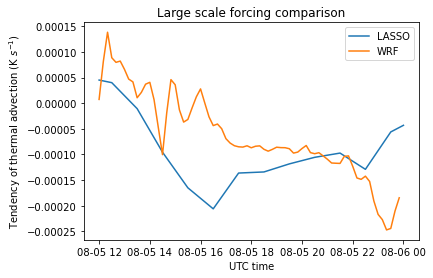

In [65]:
sel = ds.sel(Time=slice(datetime.datetime(2018, 8, 5), datetime.datetime(2018, 8, 6)))

cut_df = df_0805e['2018-08-05-12':'2018-08-05']

plt.plot(sel['Time'], sel['TH_ADV'][:, 10], label='LASSO')
plt.plot(mean, label='WRF')

plt.title('Large scale forcing comparison')
plt.xlabel('UTC time')
plt.ylabel(r'Tendency of thermal advection (K $s^{-1}$)')
plt.legend()
plt.show()

<AxesSubplot:xlabel='datetime'>

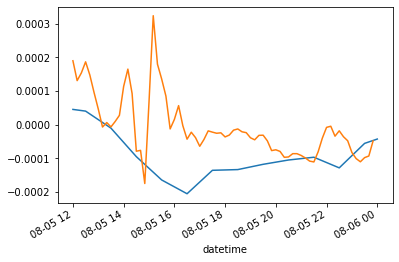

In [28]:
sel = ds.sel(Time=slice(datetime.datetime(2018, 8, 5), datetime.datetime(2018, 8, 6)))

cut_df = df_0805e['2018-08-05-12':'2018-08-05']

plt.plot(sel['Time'], sel['TH_ADV'][:, 10])
cut_df.loc[cut_df['height'] == 80]['t_adv'].plot()

<AxesSubplot:xlabel='datetime'>

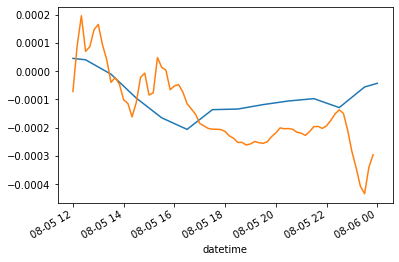

In [29]:
cut_df = df_0805e11['2018-08-05-12':'2018-08-05']

plt.plot(sel['Time'], sel['TH_ADV'][:, 10])
cut_df.loc[cut_df['height'] == 80]['t_adv'].plot()

<AxesSubplot:xlabel='datetime'>

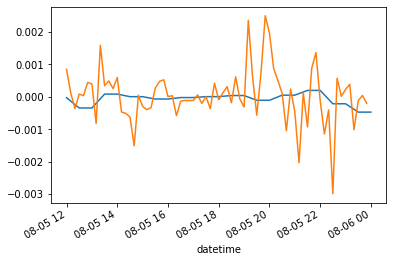

In [23]:
plt.plot(sel['Time'], sel['U_LS_TEND'][:, 10])
cut_df.loc[cut_df['height'] == 80]['u_tend'].plot()

<AxesSubplot:xlabel='datetime'>

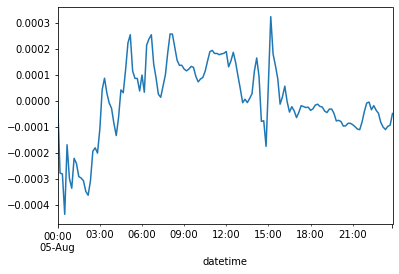

In [10]:
df = convert_xa_to_df(xa, target_date)

df.loc[df['height'] == 80]['t_adv'].plot()

<AxesSubplot:xlabel='datetime'>

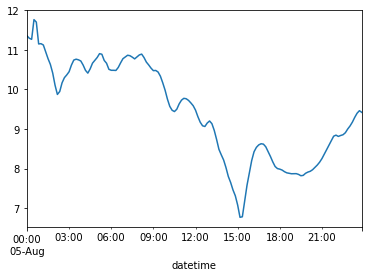

In [11]:
df.loc[df['height'] == 80]['ws'].plot()

In [14]:
dpath = '/projects/mmcpnnl/jlee/lasso/0805-3/config/'
file_filter  = 'input_ls_*'

xb = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

ERROR:root:Error while reading /projects/mmcpnnl/jlee/lasso/0805-3/config/input_ls_forcing.nc
Traceback (most recent call last):
  File "/home/jlee/pkgs/mmctools/mmctools/dataloaders.py", line 101, in read_dir
    df = reader(fpath,verbose=verbose,**kwargs)
  File "/home/jlee/pkgs/mmctools/mmctools/wrf/utils.py", line 798, in extract_column_from_wrfdata
  File "/home/jlee/pkgs/mmctools/mmctools/wrf/utils.py", line 725, in wrf_times_to_datetime
    return [ datetime.strptime(s.values.tostring().decode(), format) for s in timestrs ]
  File "/home/jlee/pkgs/mmctools/mmctools/wrf/utils.py", line 725, in <listcomp>
    return [ datetime.strptime(s.values.tostring().decode(), format) for s in timestrs ]
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf0 in position 0: invalid continuation byte


Reading /projects/mmcpnnl/jlee/lasso/0805-3/config/input_ls_forcing.nc
hiii
No dataframes were read!


In [175]:
import xarray as xr
from mmctools.wrf.utils import wrf_times_to_datetime

lasso_file = '/projects/mmcpnnl/jlee/lasso/0805-3/config/input_ls_forcing.nc'

# ds = xr.open_dataset(lasso_file, decode_cf=True, decode_times=False)
ds = xr.open_dataset(lasso_file)

for ind, val in enumerate(ds['Times']): 

    ds.Times.values[ind] = ds.Times.values[ind].decode("utf-8")
    ds.Times.values[ind] = datetime.datetime.strptime(ds.Times.values[ind], '%Y-%m-%d_%H:%M:%S')
#     ds.Times.values[ind] = np.datetime64(ds.Times.values[ind])

# ds = wrf_times_to_datetime(ds)

ds = ds.assign_coords({'Time': ds.Times})

# ds = xr.decode_cf(ds)

ds

<xarray.Dataset>
Dimensions:      (Time: 31, force_layers: 751)
Coordinates:
  * Time         (Time) object 2018-08-05T12:00:00 ... 2018-08-06T03:00:00
Dimensions without coordinates: force_layers
Data variables:
    Times        (Time) object 2018-08-05T12:00:00 ... 2018-08-06T03:00:00
    Z_LS         (Time, force_layers) float32 ...
    U_LS         (Time, force_layers) float32 ...
    V_LS         (Time, force_layers) float32 ...
    W_LS         (Time, force_layers) float32 ...
    TH_ADV       (Time, force_layers) float32 ...
    TH_RLX       (Time, force_layers) float32 ...
    QV_ADV       (Time, force_layers) float32 ...
    QV_RLX       (Time, force_layers) float32 ...
    Z_LS_TEND    (Time, force_layers) float32 ...
    W_LS_TEND    (Time, force_layers) float32 ...
    U_LS_TEND    (Time, force_layers) float32 ...
    V_LS_TEND    (Time, force_layers) float32 ...
    TH_ADV_TEND  (Time, force_layers) float32 ...
    TH_RLX_TEND  (Time, force_layers) float32 ...
    QV_ADV_TEND  (Time, force_layers) float32 ...
    QV_RLX_TEND  (Time, force_layers) float32 ...
    INV_TAU_S    (Time, force_layers) float32 ...
    INV_TAU_M    (Time, force_layers) float32 ...
    P_SFC_OPT    (Time) float32 ...
Attributes:
    TITLE:    AUXILIARY FORCING FOR CRM/LES/SCM
    SOURCE:   ecmwf/sgpecmwffrc_mddhmassfix_d20.20180805.nc

In [162]:
datetime.datetime(2011, 6, 1)

datetime.datetime(2011, 6, 1, 0, 0)

In [165]:
ds['t']

<xarray.DataArray 't' (Time: 31)>
array([datetime.datetime(2018, 8, 5, 12, 0),
       datetime.datetime(2018, 8, 5, 12, 30),
       datetime.datetime(2018, 8, 5, 13, 0),
       datetime.datetime(2018, 8, 5, 13, 30),
       datetime.datetime(2018, 8, 5, 14, 0),
       datetime.datetime(2018, 8, 5, 14, 30),
       datetime.datetime(2018, 8, 5, 15, 0),
       datetime.datetime(2018, 8, 5, 15, 30),
       datetime.datetime(2018, 8, 5, 16, 0),
       datetime.datetime(2018, 8, 5, 16, 30),
       datetime.datetime(2018, 8, 5, 17, 0),
       datetime.datetime(2018, 8, 5, 17, 30),
       datetime.datetime(2018, 8, 5, 18, 0),
       datetime.datetime(2018, 8, 5, 18, 30),
       datetime.datetime(2018, 8, 5, 19, 0),
       datetime.datetime(2018, 8, 5, 19, 30),
       datetime.datetime(2018, 8, 5, 20, 0),
       datetime.datetime(2018, 8, 5, 20, 30),
       datetime.datetime(2018, 8, 5, 21, 0),
       datetime.datetime(2018, 8, 5, 21, 30),
       datetime.datetime(2018, 8, 5, 22, 0),
       datetime.datetime(2018, 8, 5, 22, 30),
       datetime.datetime(2018, 8, 5, 23, 0),
       datetime.datetime(2018, 8, 5, 23, 30),
       datetime.datetime(2018, 8, 6, 0, 0),
       datetime.datetime(2018, 8, 6, 0, 30),
       datetime.datetime(2018, 8, 6, 1, 0),
       datetime.datetime(2018, 8, 6, 1, 30),
       datetime.datetime(2018, 8, 6, 2, 0),
       datetime.datetime(2018, 8, 6, 2, 30),
       datetime.datetime(2018, 8, 6, 3, 0)], dtype=object)
Coordinates:
    t        (Time) object 2018-08-05T12:00:00 ... 2018-08-06T03:00:00
Dimensions without coordinates: Time

In [171]:
ds['t'] > datetime.datetime(2018, 8, 5)

<xarray.DataArray 't' (Time: 31)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])
Coordinates:
    t        (Time) object 2018-08-05T12:00:00 ... 2018-08-06T03:00:00
Dimensions without coordinates: Time

In [193]:
df['2018-08-05-12':'2018-08-05']

height       U10       V10         U         V         W  \
datetime                                                                        
2018-08-05 12:00:00     0.0 -0.048699  4.726513  0.000000  0.000000  0.000000   
2018-08-05 12:00:00     5.0 -0.048699  4.726513 -0.057497  4.050394 -0.008879   
2018-08-05 12:00:00    10.0 -0.048699  4.726513 -0.039919  4.972892 -0.011586   
2018-08-05 12:00:00    15.0 -0.048699  4.726513 -0.017465  5.459545 -0.013246   
2018-08-05 12:00:00    20.0 -0.048699  4.726513  0.011894  5.915063 -0.013756   
...                     ...       ...       ...       ...       ...       ...   
2018-08-05 23:50:00  1980.0 -0.599968  6.496499  3.860966  7.409664  0.049730   
2018-08-05 23:50:00  1985.0 -0.599968  6.496499  3.883925  7.379840  0.049241   
2018-08-05 23:50:00  1990.0 -0.599968  6.496499  3.906884  7.350016  0.048752   
2018-08-05 23:50:00  1995.0 -0.599968  6.496499  3.929843  7.320192  0.048264   
2018-08-05 23:50:00  2000.0 -0.599968  6.496499  3.952801  7.290368  0.047775   

                          theta  T_TEND_ADV           MUT        ws  \
datetime                                                              
2018-08-05 12:00:00  296.170709   -3.859502  87584.228466  0.000000   
2018-08-05 12:00:00  298.731434   -4.759125  87584.228466  4.050802   
2018-08-05 12:00:00  298.846956   -4.078792  87584.228466  4.973053   
2018-08-05 12:00:00  298.924309   -2.078091  87584.228466  5.459573   
2018-08-05 12:00:00  298.989780   -1.533569  87584.228466  5.915075   
...                         ...         ...           ...       ...   
2018-08-05 23:50:00  312.985628   -1.246700  87201.509401  8.355249   
2018-08-05 23:50:00  312.990635   -1.070559  87201.509401  8.339479   
2018-08-05 23:50:00  312.995642   -0.894418  87201.509401  8.323850   
2018-08-05 23:50:00  313.000649   -0.718277  87201.509401  8.308362   
2018-08-05 23:50:00  313.005656   -0.542136  87201.509401  8.293015   

                             wd      ws10        wd10     t_adv  
datetime                                                         
2018-08-05 12:00:00  180.000000  4.726764  179.409685 -0.000044  
2018-08-05 12:00:00  179.186722  4.726764  179.409685 -0.000054  
2018-08-05 12:00:00  179.540080  4.726764  179.409685 -0.000047  
2018-08-05 12:00:00  179.816709  4.726764  179.409685 -0.000024  
2018-08-05 12:00:00  180.115208  4.726764  179.409685 -0.000018  
...                         ...       ...         ...       ...  
2018-08-05 23:50:00  207.522747  6.524145  174.723559 -0.000014  
2018-08-05 23:50:00  207.757318  6.524145  174.723559 -0.000012  
2018-08-05 23:50:00  207.992774  6.524145  174.723559 -0.000010  
2018-08-05 23:50:00  208.229112  6.524145  174.723559 -0.000008  
2018-08-05 23:50:00  208.466328  6.524145  174.723559 -0.000006  

[28872 rows x 14 columns]

<AxesSubplot:xlabel='datetime'>

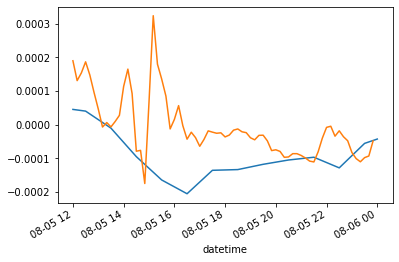

In [196]:
sel = ds.sel(Time=slice(datetime.datetime(2018, 8, 5), datetime.datetime(2018, 8, 6)))
# sel = ds.sel(t=pd.datetime(2011, 6, 6))

cut_df = df['2018-08-05-12':'2018-08-05']

plt.plot(sel['Time'], sel['TH_ADV'][:, 10])
cut_df.loc[cut_df['height'] == 80]['t_adv'].plot()

In [183]:
sel

<xarray.Dataset>
Dimensions:      (Time: 25, force_layers: 751)
Coordinates:
  * Time         (Time) object 2018-08-05T12:00:00 ... 2018-08-06
Dimensions without coordinates: force_layers
Data variables:
    Times        (Time) object 2018-08-05T12:00:00 ... 2018-08-06
    Z_LS         (Time, force_layers) float32 0.0 20.0 ... 1.498e+04 1.5e+04
    U_LS         (Time, force_layers) float32 -0.07477 0.00518 ... 8.959 8.788
    V_LS         (Time, force_layers) float32 4.417 4.436 5.69 ... -3.474 -3.339
    W_LS         (Time, force_layers) float32 0.0 -0.0003022 ... -0.002127
    TH_ADV       (Time, force_layers) float32 2.934e-06 9.621e-07 ... -0.0004346
    TH_RLX       (Time, force_layers) float32 300.2 300.1 300.3 ... 373.4 373.8
    QV_ADV       (Time, force_layers) float32 1.982e-08 2.437e-08 ... -6.252e-11
    QV_RLX       (Time, force_layers) float32 0.01183 0.01171 ... 4.203e-06
    Z_LS_TEND    (Time, force_layers) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    W_LS_TEND    (Time, force_layers) float32 0.0 5.379e-08 ... 4.749e-08
    U_LS_TEND    (Time, force_layers) float32 -4.732e-05 ... -2.296e-05
    V_LS_TEND    (Time, force_layers) float32 9.158e-05 -9.885e-05 ... 5.359e-05
    TH_ADV_TEND  (Time, force_layers) float32 -9.011e-09 ... -6.878e-08
    TH_RLX_TEND  (Time, force_layers) float32 0.0003975 0.0002268 ... -0.0003529
    QV_ADV_TEND  (Time, force_layers) float32 -1.1e-11 -1.183e-11 ... -3.103e-15
    QV_RLX_TEND  (Time, force_layers) float32 1.103e-07 7.925e-08 ... -6.631e-11
    INV_TAU_S    (Time, force_layers) float32 0.0 0.0 ... 2.315e-05 2.315e-05
    INV_TAU_M    (Time, force_layers) float32 0.0 0.0 ... 9.259e-05 9.259e-05
    P_SFC_OPT    (Time) float32 979.4 979.6 979.7 979.8 ... 977.2 977.2 977.2
Attributes:
    TITLE:    AUXILIARY FORCING FOR CRM/LES/SCM
    SOURCE:   ecmwf/sgpecmwffrc_mddhmassfix_d20.20180805.nc

In [103]:
ds.Times.values[0]

datetime.datetime(2018, 8, 5, 12, 0)

In [101]:
datetime.datetime.strptime(ds.Times.values[0], '%Y-%m-%d_%H:%M:%S')

datetime.datetime(2018, 8, 5, 12, 0)

In [95]:
[ datetime.strptime(ds.values.tostring().decode(), '%Y-%m-%d_%H:%M:%S') for s in timestrs ]

NameError: name 'timestrs' is not defined

In [87]:
ds['Times']

<xarray.DataArray 'Times' (Time: 31)>
array(['2018-08-05_12:00:00', '2018-08-05_12:30:00', '2018-08-05_13:00:00',
       '2018-08-05_13:30:00', '2018-08-05_14:00:00', '2018-08-05_14:30:00',
       '2018-08-05_15:00:00', '2018-08-05_15:30:00', '2018-08-05_16:00:00',
       '2018-08-05_16:30:00', '2018-08-05_17:00:00', '2018-08-05_17:30:00',
       '2018-08-05_18:00:00', '2018-08-05_18:30:00', '2018-08-05_19:00:00',
       '2018-08-05_19:30:00', '2018-08-05_20:00:00', '2018-08-05_20:30:00',
       '2018-08-05_21:00:00', '2018-08-05_21:30:00', '2018-08-05_22:00:00',
       '2018-08-05_22:30:00', '2018-08-05_23:00:00', '2018-08-05_23:30:00',
       '2018-08-06_00:00:00', '2018-08-06_00:30:00', '2018-08-06_01:00:00',
       '2018-08-06_01:30:00', '2018-08-06_02:00:00', '2018-08-06_02:30:00',
       '2018-08-06_03:00:00'], dtype=object)
Dimensions without coordinates: Time

In [77]:
import datetime

type(ds.Times[0].values)

ds.Times.values[0].decode("utf-8") 

# datetime.datetime(int(float(ds.Times[0])))

'2018-08-05_12:00:00'

In [57]:
eval(ds.Times.values[0])

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<string>, line 1)

In [65]:
ds.Times.values[0]

b'2018-08-05_12:00:00'

In [33]:
pd.to_datetime(ds.Times)

TypeError: <class 'bytes'> is not convertible to datetime

In [19]:
ds['Times']

<xarray.DataArray 'Times' (Time: 31)>
array([b'2018-08-05_12:00:00', b'2018-08-05_12:30:00', b'2018-08-05_13:00:00',
       b'2018-08-05_13:30:00', b'2018-08-05_14:00:00', b'2018-08-05_14:30:00',
       b'2018-08-05_15:00:00', b'2018-08-05_15:30:00', b'2018-08-05_16:00:00',
       b'2018-08-05_16:30:00', b'2018-08-05_17:00:00', b'2018-08-05_17:30:00',
       b'2018-08-05_18:00:00', b'2018-08-05_18:30:00', b'2018-08-05_19:00:00',
       b'2018-08-05_19:30:00', b'2018-08-05_20:00:00', b'2018-08-05_20:30:00',
       b'2018-08-05_21:00:00', b'2018-08-05_21:30:00', b'2018-08-05_22:00:00',
       b'2018-08-05_22:30:00', b'2018-08-05_23:00:00', b'2018-08-05_23:30:00',
       b'2018-08-06_00:00:00', b'2018-08-06_00:30:00', b'2018-08-06_01:00:00',
       b'2018-08-06_01:30:00', b'2018-08-06_02:00:00', b'2018-08-06_02:30:00',
       b'2018-08-06_03:00:00'], dtype=object)
Dimensions without coordinates: Time

In [18]:
ds['TH_ADV']

<xarray.DataArray 'TH_ADV' (Time: 31, force_layers: 751)>
array([[ 2.934008e-06,  9.621326e-07, -5.463238e-06, ..., -1.206740e-05,
        -7.204985e-06, -2.342566e-06],
       [-1.328612e-05, -1.297416e-05, -1.617391e-05, ...,  1.717690e-05,
         1.828721e-05,  1.939753e-05],
       [-2.924198e-05, -3.042054e-05, -3.353919e-05, ..., -9.512689e-06,
        -1.007294e-05, -1.063319e-05],
       ...,
       [-1.770638e-05, -2.589334e-05, -4.370553e-05, ..., -4.148327e-04,
        -4.035098e-04, -3.921868e-04],
       [-2.153632e-06, -1.360725e-05, -4.090598e-05, ..., -4.732450e-04,
        -4.611958e-04, -4.491466e-04],
       [-2.597251e-05, -3.922844e-05, -6.724893e-05, ..., -3.961532e-04,
        -3.846635e-04, -3.731739e-04]], dtype=float32)
Dimensions without coordinates: Time, force_layers
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  tendency of thermal adv
    units:        K s-1
    stagger:

In [22]:
import xarray as xr
from mmctools.wrf.utils import wrf_times_to_datetime

In [29]:
import site; site.getsitepackages()

['/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages']

In [40]:
%load_ext autoreload
%autoreload 2

dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/good/'

ds = xr.open_dataset(dpath+'mmc_d02_2018-08-04_14:00:00', decode_times=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
ds

<xarray.Dataset>
Dimensions:       (Time: 6, bottom_top: 87, bottom_top_stag: 88, south_north: 220, south_north_stag: 221, west_east: 220, west_east_stag: 221)
Coordinates:
    XLAT          (Time, south_north, west_east) float32 ...
    XLONG         (Time, south_north, west_east) float32 ...
    XTIME         (Time) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times         (Time) |S19 ...
    RU_TEND_ADV   (Time, bottom_top, south_north, west_east_stag) float32 ...
    RU_TEND_PGF   (Time, bottom_top, south_north, west_east_stag) float32 ...
    RU_TEND_COR   (Time, bottom_top, south_north, west_east_stag) float32 ...
    RU_TEND_PHYS  (Time, bottom_top, south_north, west_east_stag) float32 ...
    RV_TEND_ADV   (Time, bottom_top, south_north_stag, west_east) float32 ...
    RV_TEND_PGF   (Time, bottom_top, south_north_stag, west_east) float32 ...
    RV_TEND_COR   (Time, bottom_top, south_north_stag, west_east) float32 ...
    RV_TEND_PHYS  (Time, bottom_top, south_north_stag, west_east) float32 ...
    T_TEND_ADV    (Time, bottom_top, south_north, west_east) float32 ...
    U             (Time, bottom_top, south_north, west_east_stag) float32 ...
    RU_TEND       (Time, bottom_top, south_north, west_east_stag) float32 ...
    V             (Time, bottom_top, south_north_stag, west_east) float32 ...
    RV_TEND       (Time, bottom_top, south_north_stag, west_east) float32 ...
    W             (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH            (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB           (Time, bottom_top_stag, south_north, west_east) float32 ...
    T             (Time, bottom_top, south_north, west_east) float32 ...
    MUU           (Time, south_north, west_east_stag) float32 ...
    MUV           (Time, south_north_stag, west_east) float32 ...
    MUT           (Time, south_north, west_east) float32 ...
    P             (Time, bottom_top, south_north, west_east) float32 ...
    PB            (Time, bottom_top, south_north, west_east) float32 ...
    T2            (Time, south_north, west_east) float32 ...
    PSFC          (Time, south_north, west_east) float32 ...
    U10           (Time, south_north, west_east) float32 ...
    V10           (Time, south_north, west_east) float32 ...
    HGT           (Time, south_north, west_east) float32 ...
    TSK           (Time, south_north, west_east) float32 ...
    UST           (Time, south_north, west_east) float32 ...
    HFX           (Time, south_north, west_east) float32 ...
    LH            (Time, south_north, west_east) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE:                      2018-08-04_12:00:00
    WEST-EAST_GRID_DIMENSION:        221
    SOUTH-NORTH_GRID_DIMENSION:      221
    BOTTOM-TOP_GRID_DIMENSION:       88
    DX:                              3000.0
    DY:                              3000.0
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      0
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        3
    DAMPCOEF:                        0.2
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      10
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               5
    SF_SURFACE_PHYSICS:              2
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      1
    SF_LAKE_PHYSICS:         

In [42]:
ds['XTIME'] = wrf_times_to_datetime(ds)

In [43]:
ds

<xarray.Dataset>
Dimensions:       (Time: 6, XTIME: 6, bottom_top: 87, bottom_top_stag: 88, south_north: 220, south_north_stag: 221, west_east: 220, west_east_stag: 221)
Coordinates:
    XLAT          (Time, south_north, west_east) float32 ...
    XLONG         (Time, south_north, west_east) float32 ...
  * XTIME         (XTIME) datetime64[ns] 2018-08-04T14:00:00 ... 2018-08-04T1...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times         (Time) |S19 b'2018-08-04_14:00:00' ... b'2018-08-04_14:50:00'
    RU_TEND_ADV   (Time, bottom_top, south_north, west_east_stag) float32 ...
    RU_TEND_PGF   (Time, bottom_top, south_north, west_east_stag) float32 ...
    RU_TEND_COR   (Time, bottom_top, south_north, west_east_stag) float32 ...
    RU_TEND_PHYS  (Time, bottom_top, south_north, west_east_stag) float32 ...
    RV_TEND_ADV   (Time, bottom_top, south_north_stag, west_east) float32 ...
    RV_TEND_PGF   (Time, bottom_top, south_north_stag, west_east) float32 ...
    RV_TEND_COR   (Time, bottom_top, south_north_stag, west_east) float32 ...
    RV_TEND_PHYS  (Time, bottom_top, south_north_stag, west_east) float32 ...
    T_TEND_ADV    (Time, bottom_top, south_north, west_east) float32 ...
    U             (Time, bottom_top, south_north, west_east_stag) float32 ...
    RU_TEND       (Time, bottom_top, south_north, west_east_stag) float32 ...
    V             (Time, bottom_top, south_north_stag, west_east) float32 ...
    RV_TEND       (Time, bottom_top, south_north_stag, west_east) float32 ...
    W             (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH            (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB           (Time, bottom_top_stag, south_north, west_east) float32 ...
    T             (Time, bottom_top, south_north, west_east) float32 ...
    MUU           (Time, south_north, west_east_stag) float32 ...
    MUV           (Time, south_north_stag, west_east) float32 ...
    MUT           (Time, south_north, west_east) float32 ...
    P             (Time, bottom_top, south_north, west_east) float32 ...
    PB            (Time, bottom_top, south_north, west_east) float32 ...
    T2            (Time, south_north, west_east) float32 ...
    PSFC          (Time, south_north, west_east) float32 ...
    U10           (Time, south_north, west_east) float32 ...
    V10           (Time, south_north, west_east) float32 ...
    HGT           (Time, south_north, west_east) float32 ...
    TSK           (Time, south_north, west_east) float32 ...
    UST           (Time, south_north, west_east) float32 ...
    HFX           (Time, south_north, west_east) float32 ...
    LH            (Time, south_north, west_east) float32 ...
Attributes:
    TITLE:                            OUTPUT FROM WRF V4.2.1 MODEL
    START_DATE:                      2018-08-04_12:00:00
    WEST-EAST_GRID_DIMENSION:        221
    SOUTH-NORTH_GRID_DIMENSION:      221
    BOTTOM-TOP_GRID_DIMENSION:       88
    DX:                              3000.0
    DY:                              3000.0
    AERCU_OPT:                       0
    AERCU_FCT:                       1.0
    IDEAL_CASE:                      0
    DIFF_6TH_SLOPEOPT:               0
    AUTO_LEVELS_OPT:                 2
    DIFF_6TH_THRESH:                 0.1
    DZBOT:                           50.0
    DZSTRETCH_S:                     1.3
    DZSTRETCH_U:                     1.1
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        3
    DAMPCOEF:                        0.2
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      10
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               5
    SF_SURFACE_PHYSICS:              2
    BL_

In [47]:
%load_ext autoreload
%autoreload 2

# %%time
# leads to error at restart times... 
xa = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/good/mmc_d02_2018-08-05_00:00:00
hiii
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/good/mmc_d02_2018-08-05_01:00:00
hiii


In [48]:
xa

<xarray.Dataset>
Dimensions:       (Time: 12, height: 401)
Coordinates:
  * Time          (Time) datetime64[ns] 2018-08-05 ... 2018-08-05T01:50:00
  * height        (height) float64 0.0 5.0 10.0 ... 1.99e+03 1.995e+03 2e+03
Data variables:
    U10           (Time) float64 0.6518 -0.06171 -0.6561 ... -0.8008 -0.7706
    V10           (Time) float64 7.435 7.437 7.282 7.4 ... 5.82 5.555 5.303
    T2            (Time) float64 307.9 307.6 307.3 306.9 ... 304.6 304.2 303.8
    TSK           (Time) float64 308.2 307.7 307.2 306.7 ... 303.2 302.8 302.4
    UST           (Time) float64 0.7483 0.7282 0.6989 ... 0.5037 0.4731 0.4429
    PSFC          (Time) float64 9.754e+04 9.754e+04 ... 9.76e+04 9.761e+04
    HFX           (Time) float64 21.28 5.421 -5.737 ... -60.14 -57.83 -54.88
    LH            (Time) float64 78.07 70.81 64.28 57.93 ... 6.879 6.53 6.198
    MUU           (Time) float64 8.713e+04 8.714e+04 ... 8.725e+04 8.727e+04
    MUV           (Time) float64 8.715e+04 8.715e+04 ... 8.727e+04 8.728e+04
    MUT           (Time) float64 8.715e+04 8.715e+04 ... 8.727e+04 8.728e+04
    U             (Time, height) float64 0.0 0.5879 0.6697 ... 5.57 5.602 5.633
    V             (Time, height) float64 0.0 6.632 7.736 ... 7.861 7.831 7.8
    W             (Time, height) float64 0.0 -0.01858 ... -0.03419 -0.03347
    theta         (Time, height) float64 308.2 310.0 310.0 ... 311.2 311.2 311.3
    RU_TEND       (Time, height) float64 -78.25 -89.35 1.008 ... 41.93 42.7
    RU_TEND_ADV   (Time, height) float64 -29.96 -34.78 -53.12 ... 64.62 65.63
    RU_TEND_PGF   (Time, height) float64 -96.87 -104.9 -0.8561 ... -81.38 -81.38
    RU_TEND_COR   (Time, height) float64 44.82 49.57 57.8 ... 58.48 58.25 58.02
    RU_TEND_PHYS  (Time, height) float64 3.756 0.7106 -2.814 ... 0.4404 0.4308
    RV_TEND       (Time, height) float64 12.52 1.622 -5.353 ... -16.48 -16.95
    RV_TEND_ADV   (Time, height) float64 59.73 75.82 74.86 ... -10.88 -11.09
    RV_TEND_PGF   (Time, height) float64 87.83 79.2 72.55 ... 36.13 36.11 36.09
    RV_TEND_COR   (Time, height) float64 -3.754 -4.278 -4.881 ... -41.63 -41.87
    RV_TEND_PHYS  (Time, height) float64 -131.3 -149.1 ... -0.07735 -0.07989
    T_TEND_ADV    (Time, height) float64 -4.38 -4.059 -5.565 ... 11.57 12.13

In [38]:
xa

<xarray.Dataset>
Dimensions:       (Time: 12, height: 401)
Coordinates:
  * Time          (Time) float64 120.0 130.0 140.0 150.0 ... 210.0 220.0 230.0
  * height        (height) float64 0.0 5.0 10.0 ... 1.99e+03 1.995e+03 2e+03
Data variables:
    U10           (Time) float64 0.2155 0.3136 0.3453 ... 1.236 1.453 1.552
    V10           (Time) float64 6.165 6.235 6.297 6.424 ... 7.274 7.538 7.618
    T2            (Time) float64 300.5 300.8 301.2 301.5 ... 303.6 303.9 304.3
    TSK           (Time) float64 302.4 303.1 303.7 304.2 ... 307.4 308.0 308.4
    UST           (Time) float64 0.6543 0.6692 0.6819 ... 0.7979 0.8222 0.8326
    PSFC          (Time) float64 9.784e+04 9.784e+04 ... 9.777e+04 9.776e+04
    HFX           (Time) float64 111.3 129.3 145.5 161.8 ... 254.8 272.8 276.8
    LH            (Time) float64 90.69 90.34 95.02 101.5 ... 134.2 139.7 142.2
    MUU           (Time) float64 8.746e+04 8.747e+04 ... 8.74e+04 8.739e+04
    MUV           (Time) float64 8.748e+04 8.748e+04 ... 8.741e+04 8.74e+04
    MUT           (Time) float64 8.748e+04 8.748e+04 ... 8.741e+04 8.74e+04
    U             (Time, height) float64 0.0 0.1918 0.2316 ... 7.69 7.686 7.683
    V             (Time, height) float64 0.0 5.589 6.408 ... 6.917 6.927 6.937
    W             (Time, height) float64 0.0 -0.01407 ... 0.01231 0.01285
    theta         (Time, height) float64 302.4 302.2 302.0 ... 310.4 310.4 310.5
    RU_TEND       (Time, height) float64 -31.5 36.68 36.48 ... 13.72 14.35 14.97
    RU_TEND_ADV   (Time, height) float64 9.089 12.05 11.48 ... 11.58 11.98 12.37
    RU_TEND_PGF   (Time, height) float64 -159.9 -96.17 -99.64 ... -49.19 -49.03
    RU_TEND_COR   (Time, height) float64 38.53 42.47 48.8 ... 51.5 51.57 51.63
    RU_TEND_PHYS  (Time, height) float64 80.77 78.34 ... -0.009151 -0.008403
    RV_TEND       (Time, height) float64 -225.6 -68.83 76.74 ... -3.483 -3.993
    RV_TEND_ADV   (Time, height) float64 36.84 39.74 20.18 ... 28.95 28.82 28.69
    RV_TEND_PGF   (Time, height) float64 -185.5 -30.56 114.8 ... 24.98 24.57
    RV_TEND_COR   (Time, height) float64 -1.097 -1.244 -1.524 ... -57.29 -57.26
    RV_TEND_PHYS  (Time, height) float64 -75.78 -76.77 ... 0.00944 0.009372
    T_TEND_ADV    (Time, height) float64 5.479 5.057 3.414 ... 5.53 5.515 5.501

<AxesSubplot:xlabel='datetime'>

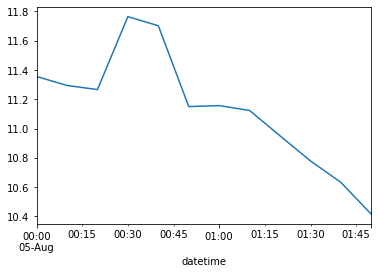

In [49]:
target_date = '2018-08-05'
df = convert_xa_to_df(xa, target_date)

df.loc[df['height'] == 80]['ws'].plot()

In [39]:
xa['Time'] = wrf_times_to_datetime(xa)

KeyError: 'Times'

In [14]:
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/'

ds = xr.open_dataset(dpath+'wrfout_d02_2018-08-05_12:00:00', decode_times=True)

In [15]:
ds

<xarray.Dataset>
Dimensions:                (Time: 1, bottom_top: 87, bottom_top_stag: 88, seed_dim_stag: 33, soil_layers_stag: 4, south_north: 220, south_north_stag: 221, west_east: 220, west_east_stag: 221)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, seed_dim_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    VAR_SSO                (Time, south_north, west_east) float32 ...
    RU_TEND_PGF            (Time, bottom_top, south_north, west_east_stag) float32 ...
    RV_TEND_PGF            (Time, bottom_top, south_north_stag, west_east) float32 ...
    U                      (Time, bottom_top, south_north, west_east_stag) float32 ...
    V                      (Time, bottom_top, south_north_stag, west_east) float32 ...
    W                      (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 ...
    T                      (Time, bottom_top, south_north, west_east) float32 ...
    THM                    (Time, bottom_top, south_north, west_east) float32 ...
    HFX_FORCE              (Time) float32 ...
    LH_FORCE               (Time) float32 ...
    TSK_FORCE              (Time) float32 ...
    HFX_FORCE_TEND         (Time) float32 ...
    LH_FORCE_TEND          (Time) float32 ...
    TSK_FORCE_TEND         (Time) float32 ...
    MUU                    (Time, south_north, west_east_stag) float32 ...
    MUV                    (Time, south_north_stag, west_east) float32 ...
    P                      (Time, bottom_top, south_north, west_east) float32 ...
    PB                     (Time, bottom_top, south_north, west_east) float32 ...
    FNM                    (Time, bottom_top) float32 ...
    FNP                    (Time, bottom_top) float32 ...
    RDNW                   (Time, bottom_top) float32 ...
    RDN                    (Time, bottom_top) float32 ...
    DNW                    (Time, bottom_top) float32 ...
    DN                     (Time, bottom_top) float32 ...
    CFN                    (Time) float32 ...
    CFN1                   (Time) float32 ...
    THIS_IS_AN_IDEAL_RUN   (Time) int32 ...
    Q2                     (Time, south_north, west_east) float32 ...
    T2                     (Time, south_north, west_east) float32 ...
    TH2                    (Time, south_north, west_east) float32 ...
    PSFC                   (Time, south_north, west_east) float32 ...
    U10                    (Time, south_north, west_east) float32 ...
    V10                    (Time, south_north, west_east) float32 ...
    RDX                    (Time) float32 ...
    RDY                    (Time) float32 ...
    AREA2D                 (Time, south_north, west_east) float32 ...
    DX2D                   (Time, south_north, west_east) float32 ...
    RESM                   (Time) float32 ...
    ZETATOP                (Time) float32 ...
    CF1                    (Time) float32 ...
    CF2                    (Time) float32 ...
    CF3                    (Time) float32 ...
    ITIMESTEP        

In [100]:
target_date = '2018-08-05'
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/good'

# leads to error at restart times... 
xa = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/good/mmc_d02_2018-08-04_14:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _de

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/good/mmc_d02_2018-08-04_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0805e/auxout/good/mmc_d02_2018-08-04_15:00:00
No dataframes were read!


## 0901 mynn

In [ ]:
target_date = '2018-09-01'
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/target/'

# leads to error at restart times... 
xa_0901m = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

df_0901m = convert_xa_to_df(xa_0901m, target_date)

In [95]:
target_date = '2018-09-01'
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout'

%%time
# leads to error at restart times... 
xa = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_12:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_14:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_16:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_18:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_19:00:00


ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_19:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_21:00:00


ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_21:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_22:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_23:00:00


ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-08-31_23:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_01:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_00:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_01:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_02:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_03:00:00


ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_03:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_05:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_07:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_09:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_04:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_05:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_06:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_07:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_08:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_09:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_10:00:00


ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_11:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_13:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_11:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_14:00:00


ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_14:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_16:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_18:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_20:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_21:00:00


ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_21:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_23:00:00
Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 649, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: 0000-00-00 **:00:00

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/xarray/coding/times.py", line 148, in _decode_

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_22:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-01_23:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/0901m/auxout/mmc_d02_2018-09-02_00:00:00
No dataframes were read!
CPU times: user 330 ms, sys: 472 ms, total: 802 ms
Wall time: 2.02 s


In [83]:
xa

<xarray.Dataset>
Dimensions:      (Time: 37, height: 401)
Coordinates:
  * Time         (Time) datetime64[ns] 2018-08-31T12:00:00 ... 2018-09-02
  * height       (height) float64 0.0 5.0 10.0 15.0 ... 1.99e+03 1.995e+03 2e+03
Data variables:
    U10          (Time) float64 0.03175 -0.2937 1.031 ... -3.357 -2.949 -3.488
    V10          (Time) float64 5.937 5.866 7.297 7.624 ... 5.729 5.404 5.452
    T2           (Time) float64 297.7 298.3 300.7 303.0 ... 308.6 307.7 306.0
    TSK          (Time) float64 297.2 298.3 301.6 304.8 ... 310.2 307.9 305.3
    UST          (Time) float64 0.0001 0.5318 0.6992 ... 0.6941 0.5892 0.5588
    PSFC         (Time) float64 9.77e+04 9.767e+04 ... 9.733e+04 9.731e+04
    HFX          (Time) float64 0.0 0.5901 57.41 114.4 ... 94.07 12.0 -38.31
    LH           (Time) float64 0.0 65.79 126.8 171.8 ... 171.0 121.9 76.31
    MUU          (Time) float64 0.0 8.729e+04 8.73e+04 ... 8.7e+04 8.697e+04
    MUV          (Time) float64 0.0 8.731e+04 8.732e+04 ... 8.701e+04 8.698e+04
    U            (Time, height) float64 0.0 0.02622 0.05229 ... -1.029 -1.034
    V            (Time, height) float64 0.0 6.005 6.036 ... 6.821 6.802 6.783
    W            (Time, height) float64 0.0 -0.01279 ... 0.005079 0.006018
    theta        (Time, height) float64 297.2 299.8 299.8 ... 312.0 312.0 312.1
    RU_TEND_PGF  (Time, height) float64 0.0 0.0 0.0 0.0 ... -86.0 -84.09 -82.19
    RV_TEND_PGF  (Time, height) float64 0.0 0.0 0.0 0.0 ... 23.03 22.23 21.44

<AxesSubplot:xlabel='datetime'>

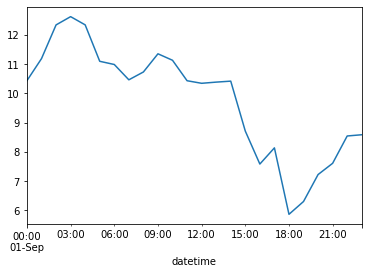

In [89]:
df = convert_xa_to_df(xa, target_date)

df.loc[df['height'] == 80]['ws'].plot()

In [54]:
df.columns

Index(['height', 'U10', 'V10', 'U', 'V', 'W', 'theta', 'T_TEND_ADV', 'ws',
       'wd', 'ws10', 'wd10'],
      dtype='object')

In [ ]:
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/'

In [3]:
%%time
# leads to error at restart times... 
xa = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-08-31_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_04:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_04:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_05:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_06:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_07:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_08:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_09:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_10:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_11:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_20:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_22:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-01_23:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_mynn/auxout/mmc_d02_2018-09-02_00:00:00
CPU times: user 2min 29s, sys: 1min 45s, total: 4min 15s
Wall time: 9min 3s


In [73]:
xa.to_dataframe().head()

U10       V10          T2         TSK  \
Time                height                                               
2018-08-31 12:00:00 0.0     0.031754  5.936772  297.678113  297.152345   
                    5.0     0.031754  5.936772  297.678113  297.152345   
                    10.0    0.031754  5.936772  297.678113  297.152345   
                    15.0    0.031754  5.936772  297.678113  297.152345   
                    20.0    0.031754  5.936772  297.678113  297.152345   

                               UST         PSFC  HFX   LH  MUU  MUV  ...  \
Time                height                                           ...   
2018-08-31 12:00:00 0.0     0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   
                    5.0     0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   
                    10.0    0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   
                    15.0    0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   
                    20.0    0.0001  97696.64127  0.0  0.0  0.0  0.0  ...   

                            RU_TEND_ADV  RU_TEND_PGF  RU_TEND_COR  \
Time                height                                          
2018-08-31 12:00:00 0.0             0.0          0.0          0.0   
                    5.0             0.0          0.0          0.0   
                    10.0            0.0          0.0          0.0   
                    15.0            0.0          0.0          0.0   
                    20.0            0.0          0.0          0.0   

                            RU_TEND_PHYS  RV_TEND  RV_TEND_ADV  RV_TEND_PGF  \
Time                height                                                    
2018-08-31 12:00:00 0.0              0.0      0.0          0.0          0.0   
                    5.0              0.0      0.0          0.0          0.0   
                    10.0             0.0      0.0          0.0          0.0   
                    15.0             0.0      0.0          0.0          0.0   
                    20.0             0.0      0.0          0.0          0.0   

                            RV_TEND_COR  RV_TEND_PHYS  T_TEND_ADV  
Time                height                                         
2018-08-31 12:00:00 0.0             0.0           0.0         0.0  
                    5.0             0.0           0.0         0.0  
                    10.0            0.0           0.0         0.0  
                    15.0            0.0           0.0         0.0  
                    20.0            0.0           0.0         0.0  

[5 rows x 26 columns]

In [40]:
df = convert_xa_to_df(xa, target_date)

<AxesSubplot:xlabel='datetime'>

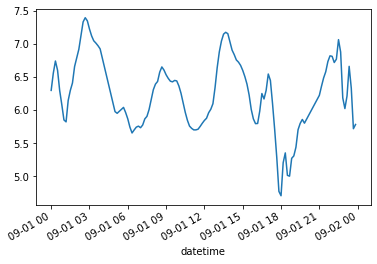

In [23]:
df.loc[df['height'] == 10]['ws10'].plot()

<AxesSubplot:xlabel='datetime'>

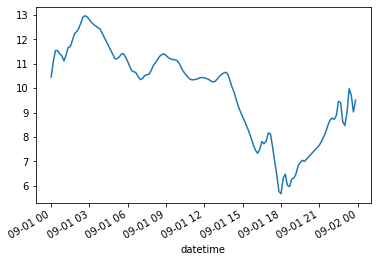

In [24]:
df.loc[df['height'] == 80]['ws'].plot()

<AxesSubplot:xlabel='datetime'>

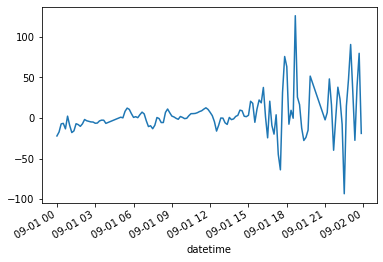

In [7]:
df.loc[df['height'] == 80]['T_TEND_ADV'].plot()

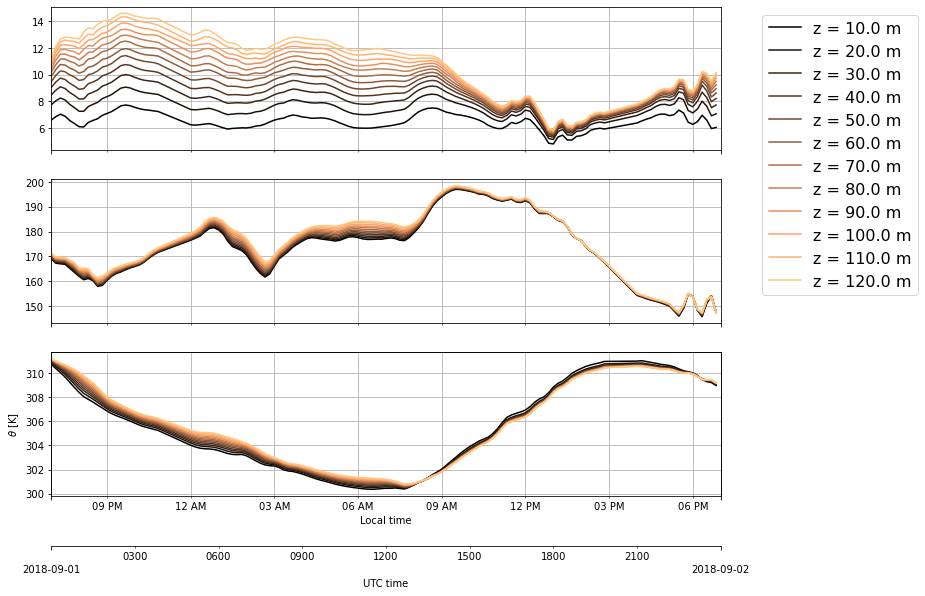

In [35]:
fig, ax, ax2 = plot_timehistory_at_height(
    df,
    fields=['ws', 'wd', 'theta'],
    heights=np.linspace(10,120,12),
    cmap='copper',
    timelimits=['2018-09-01 00:00', '2018-09-02 00:00'],
#     fieldlimits={'ws':(4,15), 'wd':(180,240)},
    plot_local_time=True,
    local_time_offset=-5
)

# plt.savefig('plots/02/ws_ts.pdf')

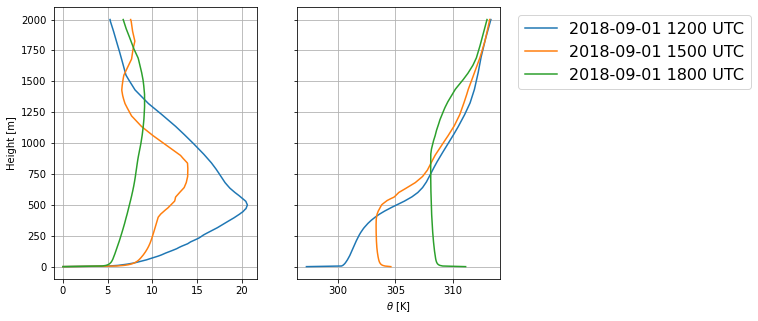

In [33]:
fig,ax = plot_profile(
    df,
    fields=['ws', 'theta'],
    times=['2018-09-01 12:00', '2018-09-01 15:00', '2018-09-01 18:00'],
    fieldlabels={'theta':r'$\theta$ [K]'},
    showlegend=True
)

## 0901 edmf

In [45]:
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/'

In [46]:
%%time
# leads to error at restart times... 
xa_0901e = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-08-31_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mm

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-09-01_18:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **k

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-09-01_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-09-01_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-09-01_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-09-01_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-09-01_22:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-09-01_23:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/analysis/0901e/auxout/mmc_d02_2018-09-02_00:00:00
CPU times: user 2min 38s, sys: 3min 16s, total: 5min 54s
Wall time: 9min 4s


In [47]:
df_0901e = convert_xa_to_df(xa_0901e, target_date)

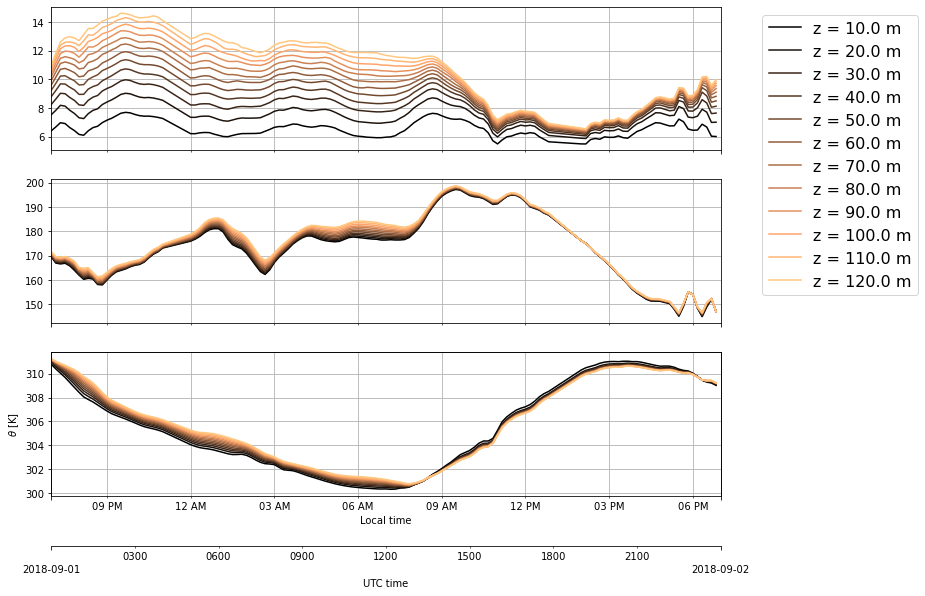

In [48]:
fig, ax, ax2 = plot_timehistory_at_height(
    df_0901e,
    fields=['ws', 'wd', 'theta'],
    heights=np.linspace(10,120,12),
    cmap='copper',
    timelimits=['2018-09-01 00:00', '2018-09-02 00:00'],
#     fieldlimits={'ws':(4,15), 'wd':(180,240)},
    plot_local_time=True,
    local_time_offset=-5
)

In [37]:
dpath = '/projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/'

In [38]:
%%time
# leads to error at restart times... 
xa_0901e = read_dir(dpath, file_filter=file_filter, 
              reader=extract_column_from_wrfdata,
              verbose=True,
              coords=(site_latitude,site_longitude),
              spatial_filter=spatial_filter, L_filter=L_filter
             )

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_13:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_14:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_15:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_16:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_17:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_18:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-08-31_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_04:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_04:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_05:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_06:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_07:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_08:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_09:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_10:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_11:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_12:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_

ERROR:root:Error while reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_18:00:00
Traceback (most recent call last):
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 655, in parse
    ret = self._build_naive(res, default)
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1241, in _build_naive
    naive = default.replace(**repl)
ValueError: year 0 is out of range

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "pandas/_libs/tslibs/conversion.pyx", line 639, in pandas._libs.tslibs.conversion._convert_str_to_tsobject
  File "pandas/_libs/tslibs/parsing.pyx", line 243, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "/home/jlee/.conda/envs/mmc_sgp/lib/python3.8/site-packages/dateutil/parser/_parser.py", line 1374, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs

Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_19:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_20:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_21:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_22:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-01_23:00:00
Reading /projects/mmcpnnl/jlee/wrf-mmc/sgp/sgp_mynn_edmf/0901_edmf/auxout/mmc_d02_2018-09-02_00:00:00
CPU times: user 2min 28s, sys: 1min 44s, total: 4min 13s
Wall time: 9min 13s


In [41]:
df_0901e = convert_xa_to_df(xa_0901e, target_date)

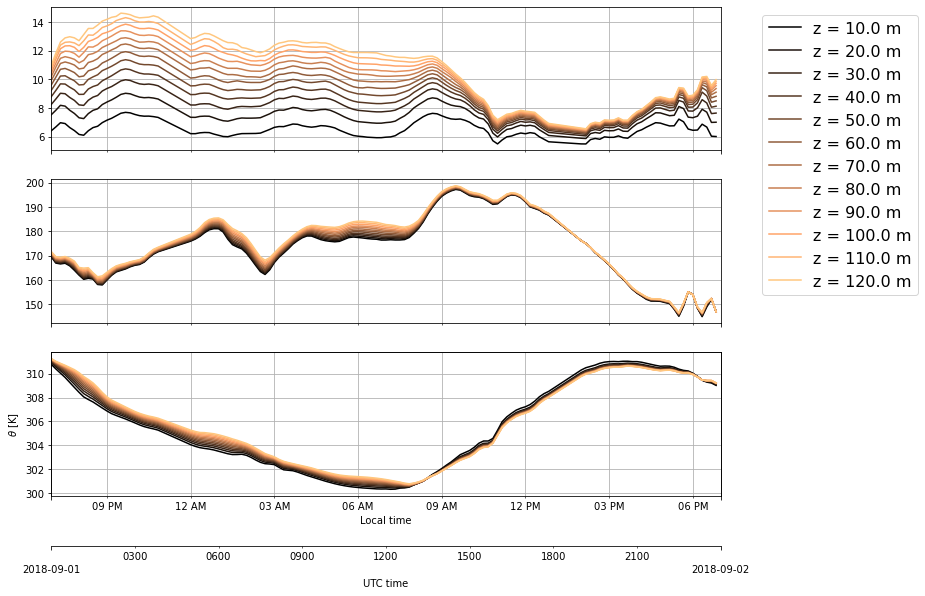

In [42]:
fig, ax, ax2 = plot_timehistory_at_height(
    df_0901e,
    fields=['ws', 'wd', 'theta'],
    heights=np.linspace(10,120,12),
    cmap='copper',
    timelimits=['2018-09-01 00:00', '2018-09-02 00:00'],
#     fieldlimits={'ws':(4,15), 'wd':(180,240)},
    plot_local_time=True,
    local_time_offset=-5
)

x and y must have same first dimension, but have shapes (0, 401) and (401,) -- 2018-09-01 18:00 not found in index?
x and y must have same first dimension, but have shapes (0, 401) and (401,) -- 2018-09-01 18:00 not found in index?


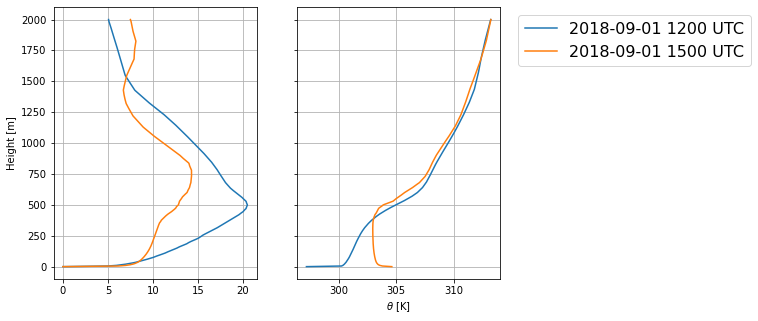

In [43]:
fig,ax = plot_profile(
    df_0901e,
    fields=['ws', 'theta'],
    times=['2018-09-01 12:00', '2018-09-01 15:00', '2018-09-01 18:00'],
    fieldlabels={'theta':r'$\theta$ [K]'},
    showlegend=True
)